In [ ]:
# Load video from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanAbsoluteError, MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
import seaborn as sns

In [ ]:
ld = pd.read_csv('/content/drive/MyDrive/drive-condition/speed_test_bus.csv')

ld['label'] = ld['label'].replace(['car','zebra crossing','human','bus stop'], [0,1,2,3])
ld['label'] = ld['label'].map({0:'car', 1:'zebra crossing', 2:'human', 3:'bus stop'})
ld = pd.get_dummies(ld, columns = ['label'], prefix='',prefix_sep='')
ld.insert (11, "bus stop", 0)
ld = ld.drop('frame', axis =1)
ld

,xmin,ymin,xmax,ymax,scaled_xmin,scaled_ymin,scaled_xmax,scaled_ymax,distance,Speed,bus stop,car,human,zebra crossing
0,455,390,485,489,441.492188,203.125000,470.601562,254.687500,32.383846,6.349545,0,0,1,0
1,88,414,131,520,85.387500,215.625000,127.110938,270.833333,27.731152,6.349545,0,0,1,0
2,938,327,1000,381,910.153125,170.312500,970.312500,198.437500,56.647587,6.349545,0,1,0,0
3,856,332,895,363,830.587500,172.916667,868.429688,189.062500,59.016460,6.349545,0,1,0,0
4,331,387,384,511,321.173438,201.562500,372.600000,266.145833,28.606018,6.349545,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26981,751,339,806,379,728.704687,176.562500,782.071875,197.395833,74.636566,3.534204,0,1,0,0
26982,911,404,1031,497,883.954687,210.416667,1000.392187,258.854167,27.968277,3.534204,0,1,0,0
26983,842,354,899,407,817.003125,184.375000,872.310938,211.979167,63.508995,3.534204,0,1,0,0
26984,507,387,544,488,491.948438,201.562500,527.850000,254.166667,32.421329,3.534204,0,0,1,0


In [ ]:
df_nm = pd.read_csv('/content/drive/MyDrive/drive-condition/speed_test(normalspeed).csv')
df_nm['label'] = df_nm['label'].replace(['car','zebra crossing','human','bus stop'], [0,1,2,3])
df_nm['label'] = df_nm['label'].map({0:'car', 1:'zebra crossing', 2:'human', 3:'bus stop'})
df_nm = pd.get_dummies(df_nm, columns = ['label'], prefix='',prefix_sep='')
df_nm.insert(13, "human", 0)
df_nm = df_nm.drop('frame', axis =1)
df_nm

,xmin,ymin,xmax,ymax,scaled_xmin,scaled_ymin,scaled_xmax,scaled_ymax,distance,Speed,bus stop,car,human,zebra crossing
0,988,331,1027,355,639.112500,114.930556,664.340625,123.263889,38.417843,5.947991,0,1,0,0
1,989,330,1028,355,639.759375,114.583333,664.987500,123.263889,38.539661,6.371807,0,1,0,0
2,1023,334,1064,364,661.753125,115.972222,688.275000,126.388889,34.412155,8.948593,0,1,0,0
3,1030,341,1075,365,666.281250,118.402778,695.390625,126.736111,33.004086,6.876885,0,1,0,0
4,1034,345,1072,369,668.868750,119.791667,693.450000,128.125000,31.564352,6.576232,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,839,251,874,397,542.728125,87.152778,565.368750,137.847222,16.685247,10.797043,0,0,0,1
1051,896,217,934,248,579.600000,75.347222,604.181250,86.111111,40.197384,7.378726,0,1,0,0
1052,896,220,931,245,579.600000,76.388889,602.240625,85.069444,41.279160,7.442066,0,1,0,0
1053,887,206,924,235,573.778125,71.527778,597.712500,81.597222,38.859924,6.124415,0,1,0,0


In [ ]:
train_df = df_nm
test_df = ld

In [ ]:
train_features = train_df.copy()
test_features = test_df.copy()
x_train, y_train = train_df.drop('Speed', axis=1), train_df['Speed']
x_test, y_test = test_df.drop('Speed', axis=1), test_df['Speed']

In [ ]:
def minmax_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

In [ ]:
def build_model_using_sequential():
  model = Sequential([
    Dense(64, input_shape = [13], kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(32, kernel_initializer='normal',  kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(16, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(8, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [ ]:
# scaled dataset
x_train_scaled, x_test_scaled = minmax_datasets(x_train, x_test)

# build the model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredLogarithmicError()

model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.001), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=1000, 
    batch_size=256,
    validation_split=0.2
)

Epoch 1/1000
4/4 [==============================] - 2s 88ms/step - loss: 4.2854 - mean_squared_logarithmic_error: 4.2328 - val_loss: 4.5957 - val_mean_squared_logarithmic_error: 4.5323
Epoch 2/1000
4/4 [==============================] - 0s 13ms/step - loss: 4.2309 - mean_squared_logarithmic_error: 4.2138 - val_loss: 4.5681 - val_mean_squared_logarithmic_error: 4.5070
Epoch 3/1000
4/4 [==============================] - 0s 11ms/step - loss: 4.1813 - mean_squared_logarithmic_error: 4.0833 - val_loss: 4.5392 - val_mean_squared_logarithmic_error: 4.4803
Epoch 4/1000
4/4 [==============================] - 0s 11ms/step - loss: 4.1297 - mean_squared_logarithmic_error: 4.0639 - val_loss: 4.5081 - val_mean_squared_logarithmic_error: 4.4511
Epoch 5/1000
4/4 [==============================] - 0s 10ms/step - loss: 4.0729 - mean_squared_logarithmic_error: 4.0078 - val_loss: 4.4755 - val_mean_squared_logarithmic_error: 4.4202
Epoch 6/1000
4/4 [==============================] - 0s 11ms/step - loss: 4.

In [ ]:
msle_score = model.evaluate(x_train_scaled, y_train, verbose=0)
print("MSLE score train:", msle_score)

MSLE score train: [0.05881475657224655, 0.05783134698867798]


In [ ]:
msle_score = model.evaluate(x_test_scaled, y_test, verbose=0)
print("MSLE score test:", msle_score)

MSLE score test: [0.46905121207237244, 0.4679288864135742]


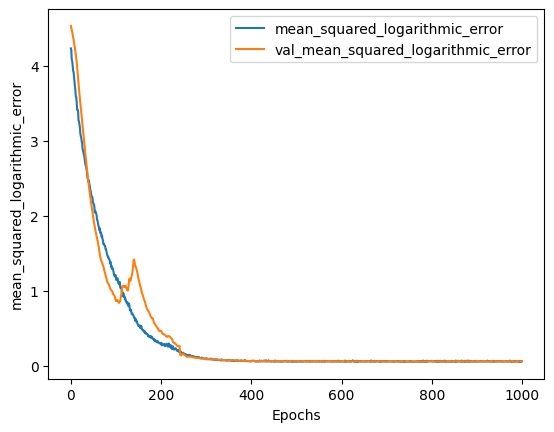

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
df_jam = pd.read_csv('/content/drive/MyDrive/drive-condition/speed_test_(busstopwithjam).csv')
df_jam['label'] = df_jam['label'].replace(['car','zebra crossing','human','bus stop'], [0,1,2,3])
df_jam['label'] = df_jam['label'].map({0:'car', 1:'zebra crossing', 2:'human', 3:'bus stop'})
df_jam = pd.get_dummies(df_jam, columns = ['label'], prefix='',prefix_sep='')
df_jam = df_jam.drop('frame', axis =1)
df_jam

,xmin,ymin,xmax,ymax,scaled_xmin,scaled_ymin,scaled_xmax,scaled_ymax,distance,Speed,bus stop,car,human,zebra crossing
0,441,304,473,391,359.397638,132.867133,385.476378,170.891608,29.123493,0.191627,0,0,1,0
1,1093,368,1382,537,890.751969,160.839161,1126.275591,234.702797,17.228344,0.191627,0,1,0,0
2,441,305,471,390,359.397638,133.304196,383.846457,170.454545,29.314838,0.191627,0,0,1,0
3,1105,373,1400,538,900.531496,163.024476,1140.944882,235.139860,17.027958,0.191627,0,1,0,0
4,439,306,469,393,357.767717,133.741259,382.216535,171.765734,28.866598,0.263261,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,445,349,894,544,362.657480,152.534965,728.574803,237.762238,13.833401,-2.297000,1,0,0,0
5132,288,160,348,332,234.708661,69.930070,283.606299,145.104895,46.632587,-2.297000,0,0,1,0
5133,914,156,1146,318,744.874016,68.181818,933.944882,138.986014,36.451576,-2.297000,0,1,0,0
5134,757,146,845,218,616.925197,63.811189,688.641732,95.279720,80.977852,-2.297000,0,1,0,0


In [ ]:
train_df = df_jam
test_df = ld.sample(frac = 0.1, random_state = 0)

train_features = train_df.copy()
test_features = test_df.copy()
x_train, y_train = train_df.drop('Speed', axis=1), train_df['Speed']
x_test, y_test = test_df.drop('Speed', axis=1), test_df['Speed']

In [ ]:
def build_model2():
  model = Sequential([
    Dense(64, input_shape = [13], kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(32, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(16, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(8, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [ ]:
# scale dataset
x_train_scaled, x_test_scaled = minmax_datasets(x_train, x_test)
# build the model
model = build_model2()

In [ ]:
# loss function
mse = MeanSquaredError()

# loss function
msle = MeanSquaredLogarithmicError()

model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.0005), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=1000, 
    batch_size=256,
    validation_split=0.5
)

Epoch 1/1000
11/11 [==============================] - 3s 30ms/step - loss: 1.7794 - mean_squared_logarithmic_error: 1.6980 - val_loss: 1.8650 - val_mean_squared_logarithmic_error: 1.6649
Epoch 2/1000
11/11 [==============================] - 0s 8ms/step - loss: 1.7465 - mean_squared_logarithmic_error: 1.6688 - val_loss: 1.8427 - val_mean_squared_logarithmic_error: 1.6469
Epoch 3/1000
11/11 [==============================] - 0s 7ms/step - loss: 1.7097 - mean_squared_logarithmic_error: 1.6153 - val_loss: 1.8204 - val_mean_squared_logarithmic_error: 1.6282
Epoch 4/1000
11/11 [==============================] - 0s 7ms/step - loss: 1.6623 - mean_squared_logarithmic_error: 1.6240 - val_loss: 1.7982 - val_mean_squared_logarithmic_error: 1.6094
Epoch 5/1000
11/11 [==============================] - 0s 8ms/step - loss: 1.6148 - mean_squared_logarithmic_error: 1.5506 - val_loss: 1.7756 - val_mean_squared_logarithmic_error: 1.5897
Epoch 6/1000
11/11 [==============================] - 0s 8ms/step - l

MSLE score train: [0.3265216052532196, 0.3232231140136719]
MSLE score test: [0.5178301930427551, 0.5122725367546082]


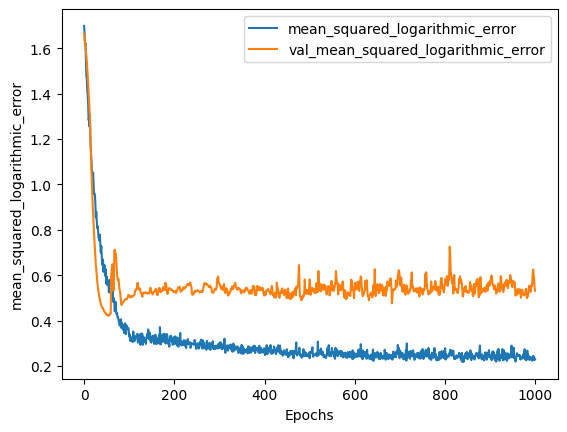

In [ ]:
msle_score = model.evaluate(x_train_scaled, y_train, verbose=0)
print("MSLE score train:", msle_score)

msle_test = model.evaluate(x_test_scaled, y_test, verbose=0)
print("MSLE score test:", msle_test)

def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
df_zb = pd.read_csv('/content/drive/MyDrive/drive-condition/speed_test(zebrastop).csv')
df_zb['label'] = df_zb['label'].replace(['car','zebra crossing','human','bus stop'], [0,1,2,3])
df_zb['label'] = df_zb['label'].map({0:'car', 1:'zebra crossing', 2:'human', 3:'bus stop'})
df_zb = pd.get_dummies(df_zb, columns = ['label'], prefix='',prefix_sep='')
df_zb.insert (11, "bus stop", 0)
df_zb = df_zb.drop('frame', axis =1)
df_zb

,xmin,ymin,xmax,ymax,scaled_xmin,scaled_ymin,scaled_xmax,scaled_ymax,distance,Speed,bus stop,car,human,zebra crossing
0,717,712,796,793,463.809375,247.222222,514.912500,275.347222,105.277794,10.626967,0,1,0,0
1,6,673,317,820,3.881250,233.680556,205.059375,284.722222,66.926018,10.626967,0,1,0,0
2,1683,722,1883,883,1088.690625,250.694444,1218.065625,306.597222,26.735104,10.626967,0,1,0,0
3,1453,750,1594,837,939.909375,260.416667,1031.118750,290.625000,55.099186,10.626967,0,1,0,0
4,602,709,750,814,389.418750,246.180556,485.156250,282.638889,71.183495,10.626967,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7880,1173,700,1275,772,758.784375,243.055556,824.765625,268.055556,127.999146,8.217923,0,1,0,0
7881,92,594,176,817,59.512500,206.250000,113.850000,283.680556,48.081509,8.217923,0,0,1,0
7882,8,591,109,863,5.175000,205.208333,70.509375,299.652778,31.112597,8.217923,0,0,1,0
7883,1565,692,1830,848,1012.359375,240.277778,1183.781250,294.444444,34.628944,8.217923,0,1,0,0


In [ ]:
train_df = df_zb
test_df = ld.sample(frac = 0.2, random_state = 0)

train_features = train_df.copy()
test_features = test_df.copy()
x_train, y_train = train_df.drop('Speed', axis=1), train_df['Speed']
x_test, y_test = test_df.drop('Speed', axis=1), test_df['Speed']

In [ ]:
def build_model3():
  model = Sequential([
    Dense(64, input_shape = [13], kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(32, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(16, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(8, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [ ]:
# scale dataset
x_train_scaled, x_test_scaled = minmax_datasets(x_train, x_test)
# build the model
model = build_model3()

# loss function
mse = MeanSquaredError()

# loss function
msle = MeanSquaredLogarithmicError()

model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.0005), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=1000, 
    batch_size=256,
    validation_split=0.5
)

Epoch 1/1000
16/16 [==============================] - 3s 21ms/step - loss: 3.7689 - mean_squared_logarithmic_error: 3.7037 - val_loss: 4.9615 - val_mean_squared_logarithmic_error: 4.9205
Epoch 2/1000
16/16 [==============================] - 0s 6ms/step - loss: 3.6397 - mean_squared_logarithmic_error: 3.5712 - val_loss: 4.9184 - val_mean_squared_logarithmic_error: 4.8808
Epoch 3/1000
16/16 [==============================] - 0s 7ms/step - loss: 3.5110 - mean_squared_logarithmic_error: 3.4614 - val_loss: 4.8765 - val_mean_squared_logarithmic_error: 4.8419
Epoch 4/1000
16/16 [==============================] - 0s 7ms/step - loss: 3.3906 - mean_squared_logarithmic_error: 3.3342 - val_loss: 4.8264 - val_mean_squared_logarithmic_error: 4.7944
Epoch 5/1000
16/16 [==============================] - 0s 6ms/step - loss: 3.2795 - mean_squared_logarithmic_error: 3.2313 - val_loss: 4.7596 - val_mean_squared_logarithmic_error: 4.7299
Epoch 6/1000
16/16 [==============================] - 0s 7ms/step - l

MSLE score train: [0.1784997284412384, 0.17479611933231354]
MSLE score test: [0.4257969558238983, 0.4221717417240143]


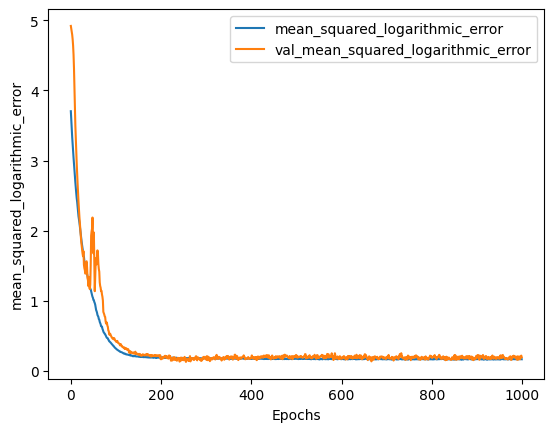

In [ ]:
msle_score = model.evaluate(x_train_scaled, y_train, verbose=0)
print("MSLE score train:", msle_score)

msle_test = model.evaluate(x_test_scaled, y_test, verbose=0)
print("MSLE score test:", msle_test)

def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
df_zbjam = pd.read_csv('/content/drive/MyDrive/drive-condition/speed_test(stopzebrajam).csv')
df_zbjam['label'] = df_zbjam['label'].replace(['car','zebra crossing','human','bus stop'], [0,1,2,3])
df_zbjam['label'] = df_zbjam['label'].map({0:'car', 1:'zebra crossing', 2:'human', 3:'bus stop'})
df_zbjam = pd.get_dummies(df_zbjam, columns = ['label'], prefix='',prefix_sep='')
df_zbjam.insert (11, "bus stop", 0)
df_zbjam = df_zbjam.drop('frame', axis =1)
df_zbjam

,xmin,ymin,xmax,ymax,scaled_xmin,scaled_ymin,scaled_xmax,scaled_ymax,distance,Speed,bus stop,car,human,zebra crossing
0,1060,681,1098,706,685.687500,236.458333,710.268750,245.138889,172.965942,5.24063,0,1,0,0
1,882,680,934,723,570.543750,236.111111,604.181250,251.041667,101.749374,5.24063,0,1,0,0
2,1147,680,1227,726,741.965625,236.111111,793.715625,252.083333,101.881027,5.24063,0,1,0,0
3,25,617,666,946,16.171875,214.236111,430.818750,328.472222,7.458077,5.24063,0,1,0,0
4,1363,634,1773,864,881.690625,220.138889,1146.909375,300.000000,14.155370,5.24063,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18604,641,628,819,783,414.646875,218.055556,529.790625,271.875000,29.380728,3.72896,0,1,0,0
18605,1242,653,1354,731,803.418750,226.736111,875.868750,253.819444,63.171909,3.72896,0,1,0,0
18606,859,649,947,718,555.665625,225.347222,612.590625,249.305556,76.665810,3.72896,0,1,0,0
18607,376,611,696,853,243.225000,212.152778,450.225000,296.180556,15.974484,3.72896,0,1,0,0


In [ ]:
train_df = df_zbjam
test_df = ld.sample(frac = 0.2, random_state = 0)

train_features = train_df.copy()
test_features = test_df.copy()
x_train, y_train = train_df.drop('Speed', axis=1), train_df['Speed']
x_test, y_test = test_df.drop('Speed', axis=1), test_df['Speed']

In [ ]:
def build_model4():
  model = Sequential([
    Dense(64, input_shape = [13], kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(32, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(16, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(8, kernel_initializer='normal', kernel_regularizer='l2', activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [ ]:
# scale dataset
x_train_scaled, x_test_scaled = minmax_datasets(x_train, x_test)

# build the model
model = build_model3()

# loss function
msle = MeanSquaredLogarithmicError()

model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.0005), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=1000, 
    batch_size=256,
    validation_split=0.5
)

Epoch 1/1000
37/37 [==============================] - 3s 12ms/step - loss: 3.9783 - mean_squared_logarithmic_error: 3.9086 - val_loss: 4.6183 - val_mean_squared_logarithmic_error: 4.5136
Epoch 2/1000
37/37 [==============================] - 0s 6ms/step - loss: 3.5862 - mean_squared_logarithmic_error: 3.5233 - val_loss: 4.3545 - val_mean_squared_logarithmic_error: 4.2573
Epoch 3/1000
37/37 [==============================] - 0s 6ms/step - loss: 3.3091 - mean_squared_logarithmic_error: 3.2591 - val_loss: 4.0167 - val_mean_squared_logarithmic_error: 3.9275
Epoch 4/1000
37/37 [==============================] - 0s 6ms/step - loss: 3.0994 - mean_squared_logarithmic_error: 3.0508 - val_loss: 3.6429 - val_mean_squared_logarithmic_error: 3.5614
Epoch 5/1000
37/37 [==============================] - 0s 5ms/step - loss: 2.9206 - mean_squared_logarithmic_error: 2.8808 - val_loss: 3.2908 - val_mean_squared_logarithmic_error: 3.2162
Epoch 6/1000
37/37 [==============================] - 0s 5ms/step - l

MSLE score train: [0.1969868689775467, 0.19664502143859863]
MSLE score test: [0.4531990885734558, 0.45253971219062805]


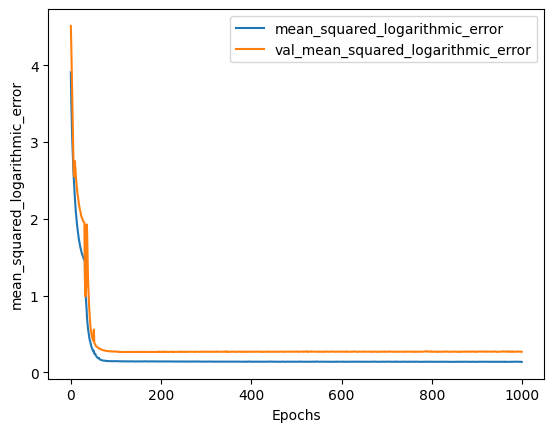

In [ ]:
msle_score = model.evaluate(x_train_scaled, y_train, verbose=0)
print("MSLE score train:", msle_score)

msle_test = model.evaluate(x_test_scaled, y_test, verbose=0)
print("MSLE score test:", msle_test)

def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')